In [1]:
import pandas  as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df=pd.read_csv('in-vehicle-coupon-recommendation.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.head(20)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


Data Cleaning and Preprocessing

In [5]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,12684.0,63.301798,19.154486,30.0,55.0,80.0,80.0,80.0
has_children,12684.0,0.414144,0.492593,0.0,0.0,0.0,1.0,1.0
toCoupon_GEQ5min,12684.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
toCoupon_GEQ15min,12684.0,0.561495,0.496224,0.0,0.0,1.0,1.0,1.0
toCoupon_GEQ25min,12684.0,0.119126,0.323950,0.0,0.0,0.0,0.0,1.0
direction_same,12684.0,0.214759,0.410671,0.0,0.0,0.0,0.0,1.0
direction_opp,12684.0,0.785241,0.410671,0.0,1.0,1.0,1.0,1.0
Y,12684.0,0.568433,0.495314,0.0,0.0,1.0,1.0,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [8]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [9]:
df['Bar'].mode()[0]

'never'

In [10]:
print(df[df['Bar'].isna()]['Y'].value_counts(normalize=True))
print(df[df['Bar'] == 'never']['Y'].value_counts(normalize=True))

Y
1    0.514019
0    0.485981
Name: proportion, dtype: float64
Y
1    0.532423
0    0.467577
Name: proportion, dtype: float64


In [11]:
df = df.assign(
    Bar=df['Bar'].fillna(df['Bar'].mode()[0]),
    CoffeeHouse=df['CoffeeHouse'].fillna(df['CoffeeHouse'].mode()[0]),
    CarryAway=df['CarryAway'].fillna(df['CarryAway'].mode()[0]),
    RestaurantLessThan20=df['RestaurantLessThan20'].fillna(df['RestaurantLessThan20'].mode()[0]),
    Restaurant20To50=df['Restaurant20To50'].fillna(df['Restaurant20To50'].mode()[0])
)

In [12]:
print(df['Bar'].unique(), ':bar')
print(df['car'].unique(), ':car')
print(df['CarryAway'].unique(), ':carryaway')
print(df['RestaurantLessThan20'].unique(), ':restaurant_less_than_20')
print(df['Restaurant20To50'].unique(), ':restaurant_20_to_50')

['never' 'less1' '1~3' 'gt8' '4~8'] :bar
[nan 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D'] :car
['1~3' '4~8' 'gt8' 'less1' 'never'] :carryaway
['4~8' '1~3' 'less1' 'gt8' 'never'] :restaurant_less_than_20
['1~3' 'less1' 'never' 'gt8' '4~8'] :restaurant_20_to_50


In [13]:
df = df.drop(columns=['car'])

In [14]:
df.rename(columns={"passanger": "passenger"}, inplace=True)

In [15]:
df.head(50)

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0


visualization

In [17]:
df_vis = df.copy()

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
sns.set(style = "whitegrid")

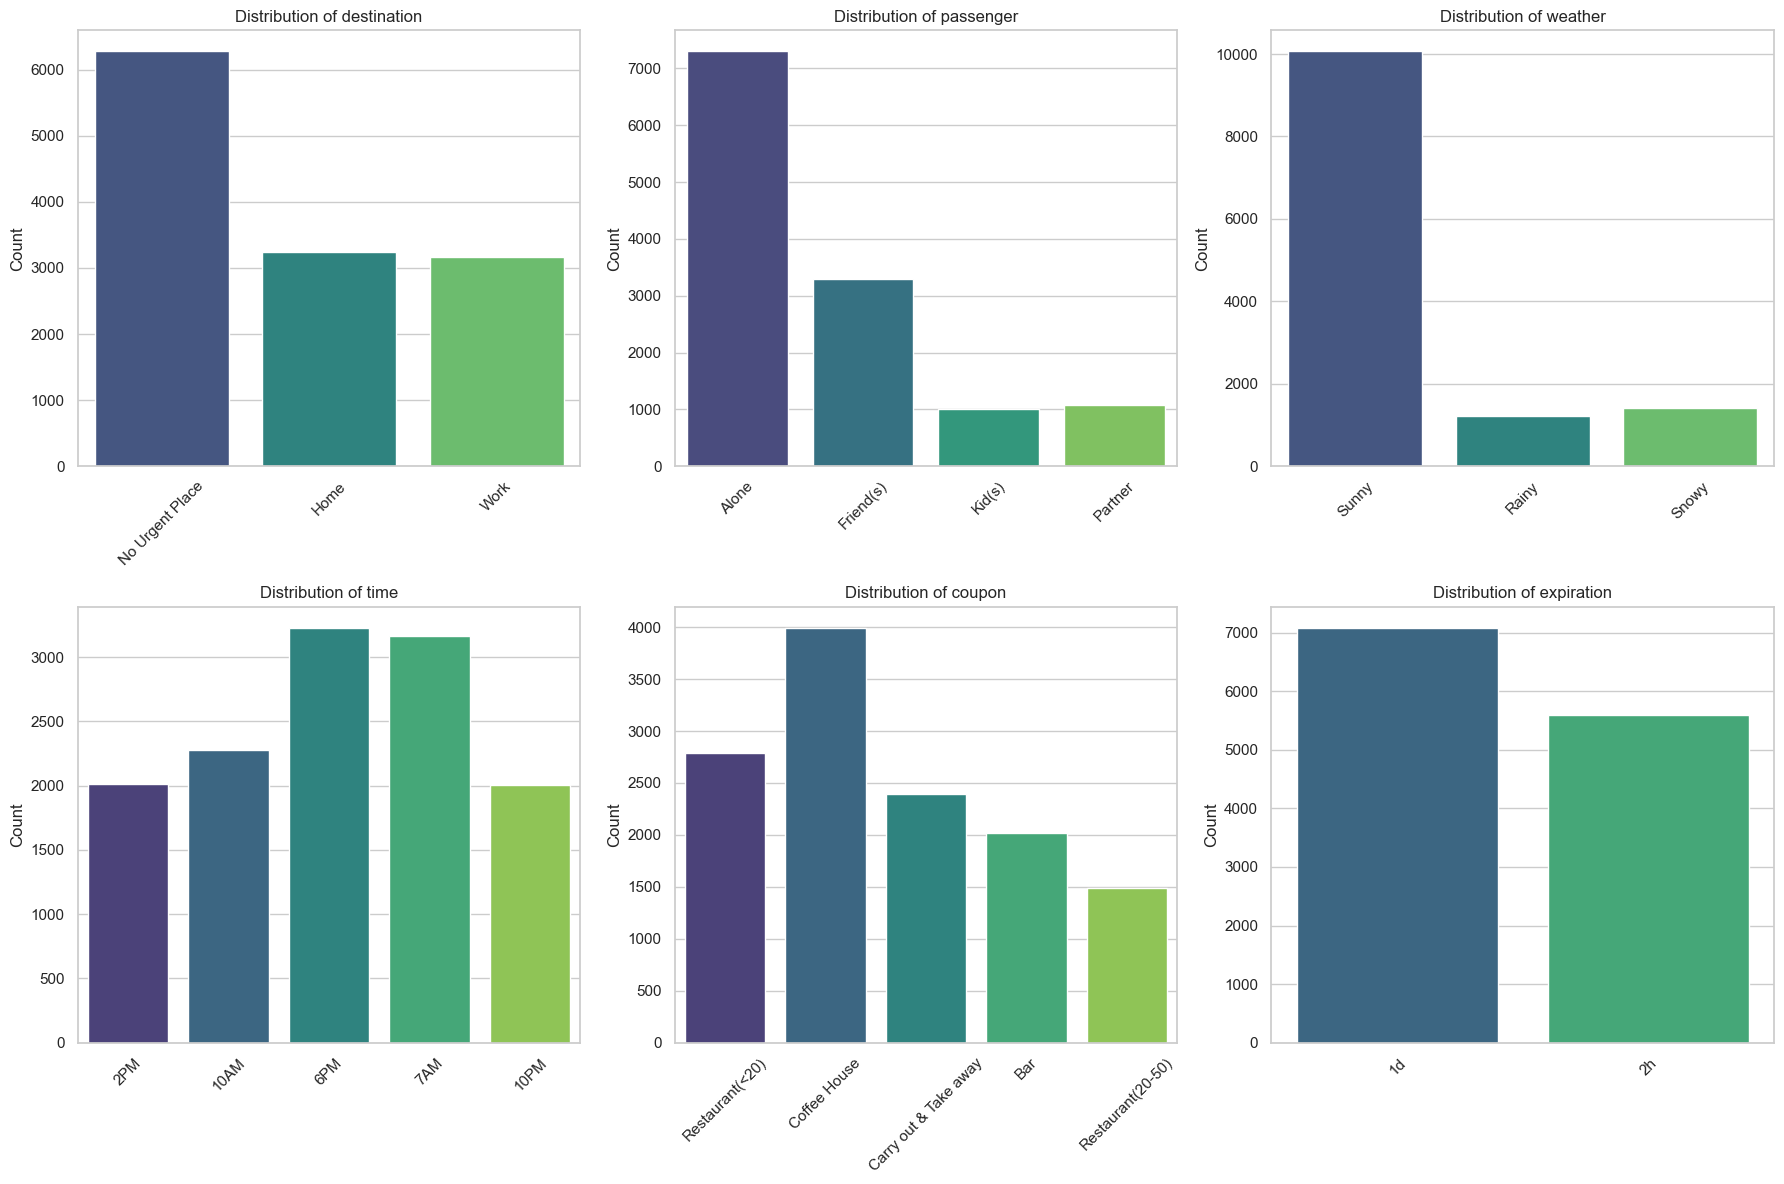

In [20]:
# Set plot style
sns.set(style="whitegrid")

# List of categorical features to visualize
categorical_features = ["destination", "passenger", "weather", "time", "coupon", "expiration"]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Loop through features and plot countplots
for ax, feature in zip(axes.flatten(), categorical_features):
  if feature in df_vis.columns:
    sns.countplot(data=df_vis, x=feature, hue= feature, palette="viridis", ax=ax, legend=False)
    ax.set_title(f"Distribution of {feature}")
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    ax.tick_params(axis="x", rotation=45)  # Rotate x labels for better readability

# Adjust layout
plt.tight_layout()
plt.show()


In [21]:
print("Available columns in df_vis:", df_vis.columns)


Available columns in df_vis: Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')


In [22]:
sns.set(style='whitegrid')

In [23]:
cat_features = ["age","Bar", "CoffeeHouse", 
                "CarryAway", "RestaurantLessThan20", "Restaurant20To50"]

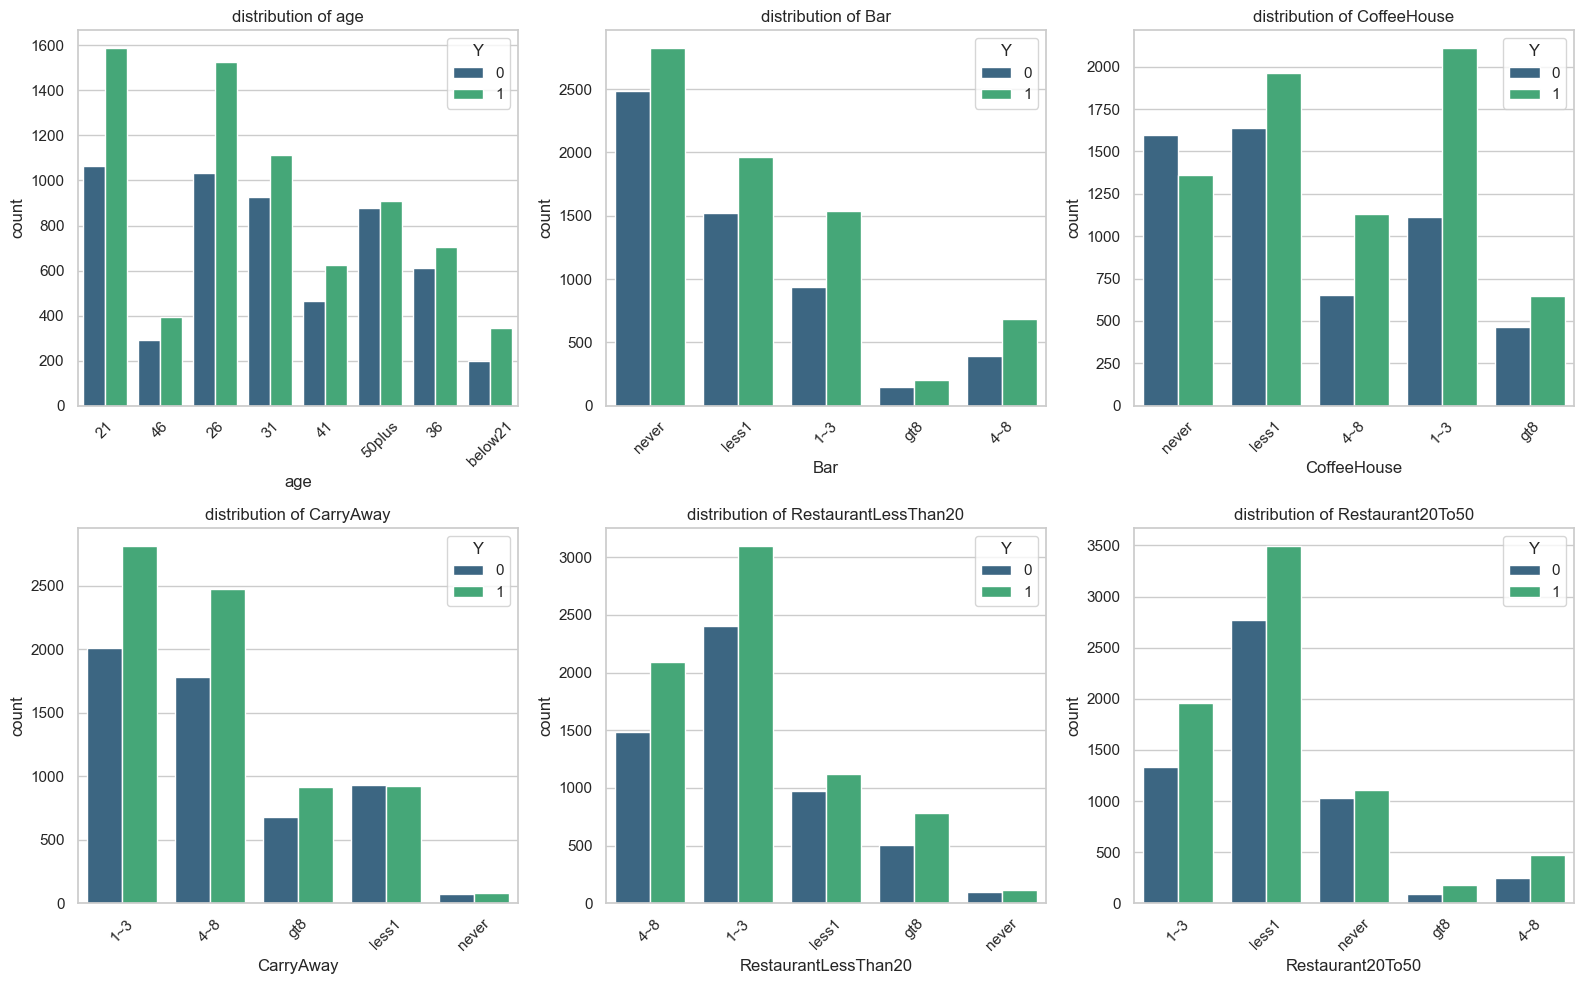

In [24]:
figure, axes =plt.subplots(nrows= 2, ncols =3, figsize=(16,10))
axes= axes.flatten()

for ax,feature in zip(axes, cat_features):
    sns.countplot(data=df_vis, x=feature, hue=df_vis['Y'], palette='viridis', legend=True, ax=ax)
    ax.set_title(f'distribution of {feature}')
    ax.set_xlabel(f'{feature}')
    ax.set_ylabel('count')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [25]:
import numpy as np
print(np.unique(df['age']))
print(np.unique(df['income']))

['21' '26' '31' '36' '41' '46' '50plus' 'below21']
['$100000 or More' '$12500 - $24999' '$25000 - $37499' '$37500 - $49999'
 '$50000 - $62499' '$62500 - $74999' '$75000 - $87499' '$87500 - $99999'
 'Less than $12500']


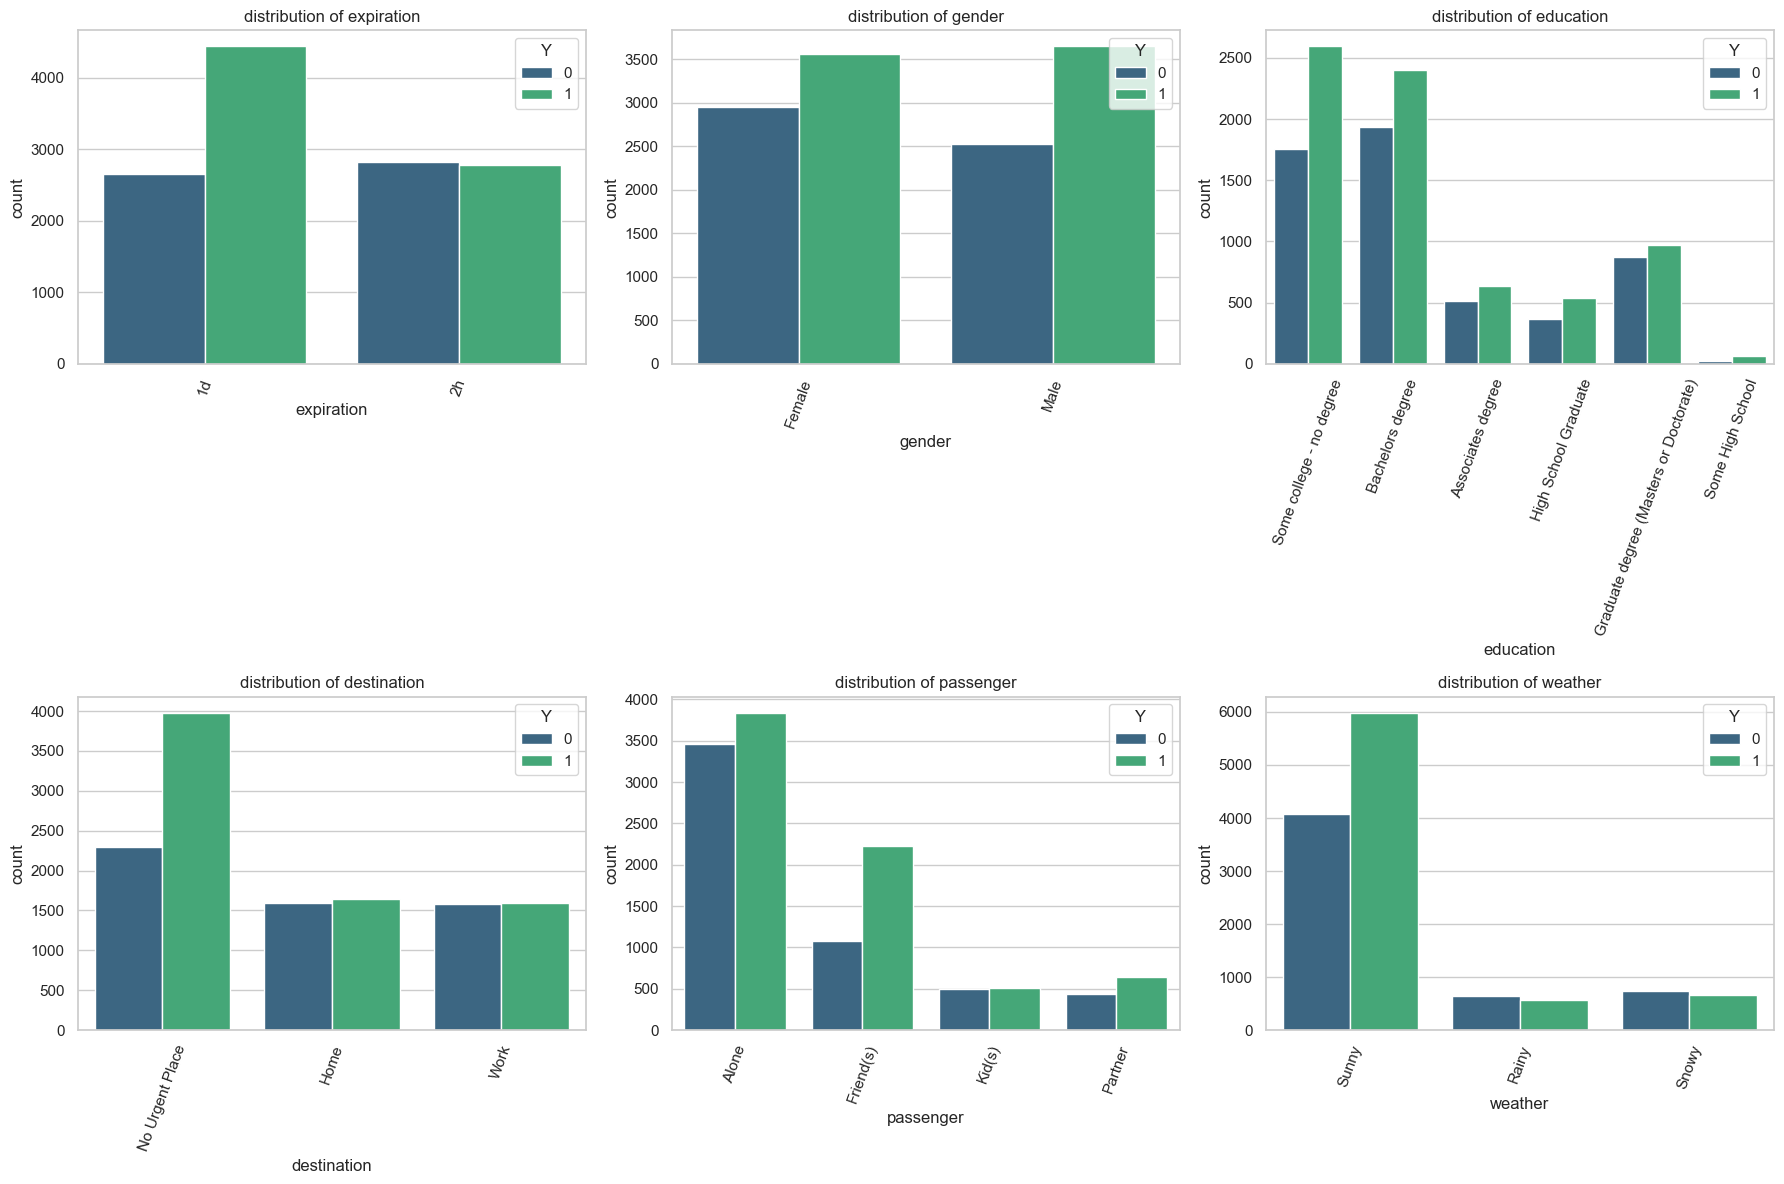

In [26]:
comparing_features=['expiration', 'gender', 'education','destination', 'passenger', 'weather', 'time', 'coupon', 'maritalStatus', 'occupation']

figure, axes =plt.subplots(nrows= 2, ncols =3, figsize=(18,12))
axes= axes.flatten()

for ax,feature in zip(axes, comparing_features):
    sns.countplot(data=df_vis, x=feature, hue=df_vis['Y'], palette='viridis', legend=True, ax=ax)
    ax.set_title(f'distribution of {feature}')
    ax.set_xlabel(f'{feature}')
    ax.set_ylabel('count')
    ax.tick_params(axis='x', rotation=70)
plt.tight_layout()
plt.show()



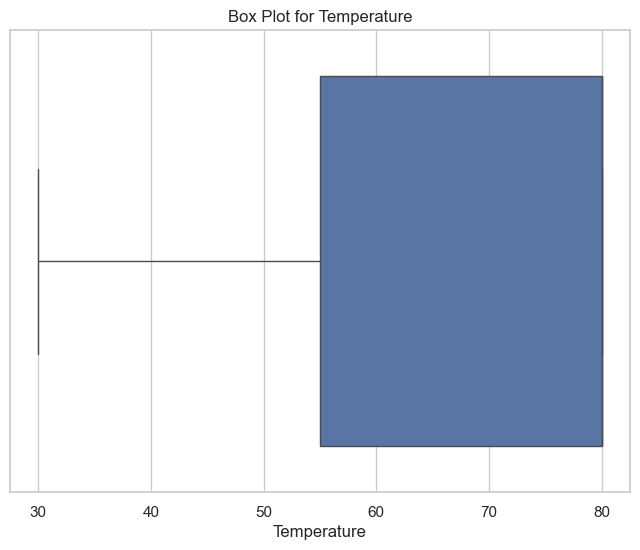

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['temperature'])
plt.title('Box Plot for Temperature')
plt.xlabel('Temperature')
plt.show()

LabelEncoder and OneHotEncoder

In [29]:
#Label Encoder

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_cols = ['expiration', 'gender', 'age', 'education', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])
    
#OneHotEncoder

df = pd.get_dummies(df, columns=['destination', 'passenger', 'weather', 'time', 'coupon', 'maritalStatus', 'occupation'], drop_first=False)



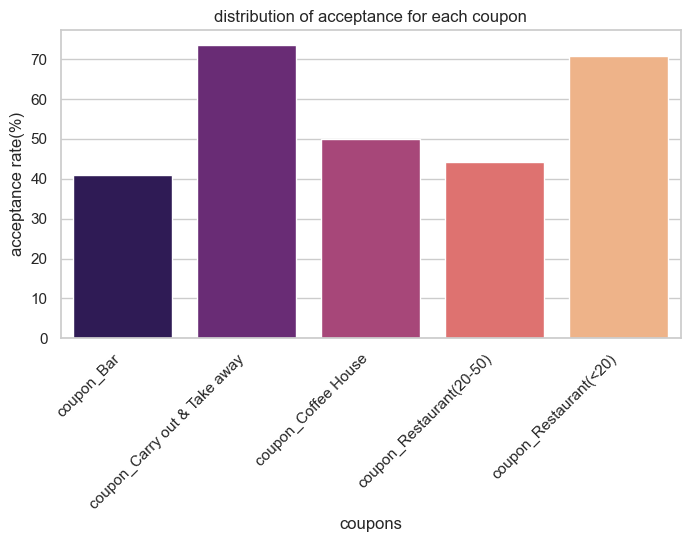

In [30]:
coupon_rate =[col for col in df.columns if 'coupon_' in col]
acceptance_rate ={}
for col in coupon_rate:
    acceptance_rate[col] = df[df[col]==1]['Y'].mean()*100
acceptance_rate_df = pd.DataFrame(list(acceptance_rate.items()), columns =['coupons', 'acceptance rate(%)'])
#bar_graph
plt.figure(figsize=(8,4))
sns.barplot(x='coupons', y='acceptance rate(%)', data=acceptance_rate_df, palette='magma')
plt.title('distribution of acceptance for each coupon')
plt.ylabel('acceptance rate(%)')
plt.xlabel('coupons')
plt.xticks(rotation=45, ha='right')
plt.show()

    

In [31]:
pd.set_option('display.max_columns',None)
df.head(15)

,temperature,expiration,gender,age,has_children,education,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,destination_Home,destination_No Urgent Place,destination_Work,passenger_Alone,passenger_Friend(s),passenger_Kid(s),passenger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,occupation_Architecture & Engineering,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed
0,55,0,0,0,1,5,3,4,4,0,1,0,1,0,0,0,1,1,False,True,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,80,1,0,0,1,5,3,4,4,0,1,0,1,0,0,0,1,0,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,80,1,0,0,1,5,3,4,4,0,1,0,1,1,0,0,1,1,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,80,1,0,0,1,5,3,4,4,0,1,0,1,1,0,0,1,0,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,80,0,0,0,1,5,3,4,4,0,1,0,1,1,0,0,1,0,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
5,80,1,0,0,1,5,3,4,4,0,1,0,1,1,0,0,1,1,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
6,55,0,0,0,1,5,3,4,4,0,1,0,1,1,0,0,1,1,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
7,80,1,0,0,1,5,3,4,4,0,1,0,1,1,0,0,1,1,False,True,False,False,False,True,False,False,False,True,True,False,False,False,Fal

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['temperature']
df[num_cols] = scaler.fit_transform(df[num_cols])


Preparing Data for Training and Testing

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score
X=df.drop(columns=['Y'])
y=df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)


Grid Search CV

In [36]:
param_grid= {
    'n_estimators':[200, 250, 300],
    'max_depth':[None, 10, 20, 30],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4]
}
rf= RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print('Best parameter:',grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameter: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [37]:
best_rf=grid_search.best_estimator_
y_predict=best_rf.predict(X_test)
accuracy=accuracy_score(y_test, y_predict)
print('accuracy:',accuracy)
print('classification_report:')
print(classification_report(y_test, y_predict))

accuracy: 0.7457627118644068
classification_report:
              precision    recall  f1-score   support

           0       0.75      0.64      0.69      1128
           1       0.74      0.83      0.78      1409

    accuracy                           0.75      2537
   macro avg       0.75      0.74      0.74      2537
weighted avg       0.75      0.75      0.74      2537



Confusion Matrix

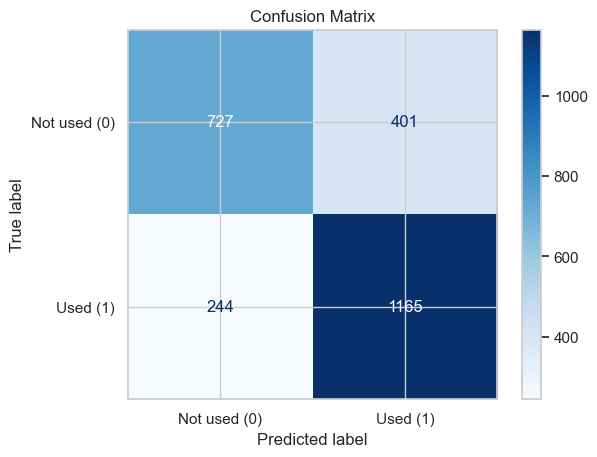

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test, y_predict)
display_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not used (0)', 'Used (1)'])
display_cm.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

FEATURE IMPORTANCE

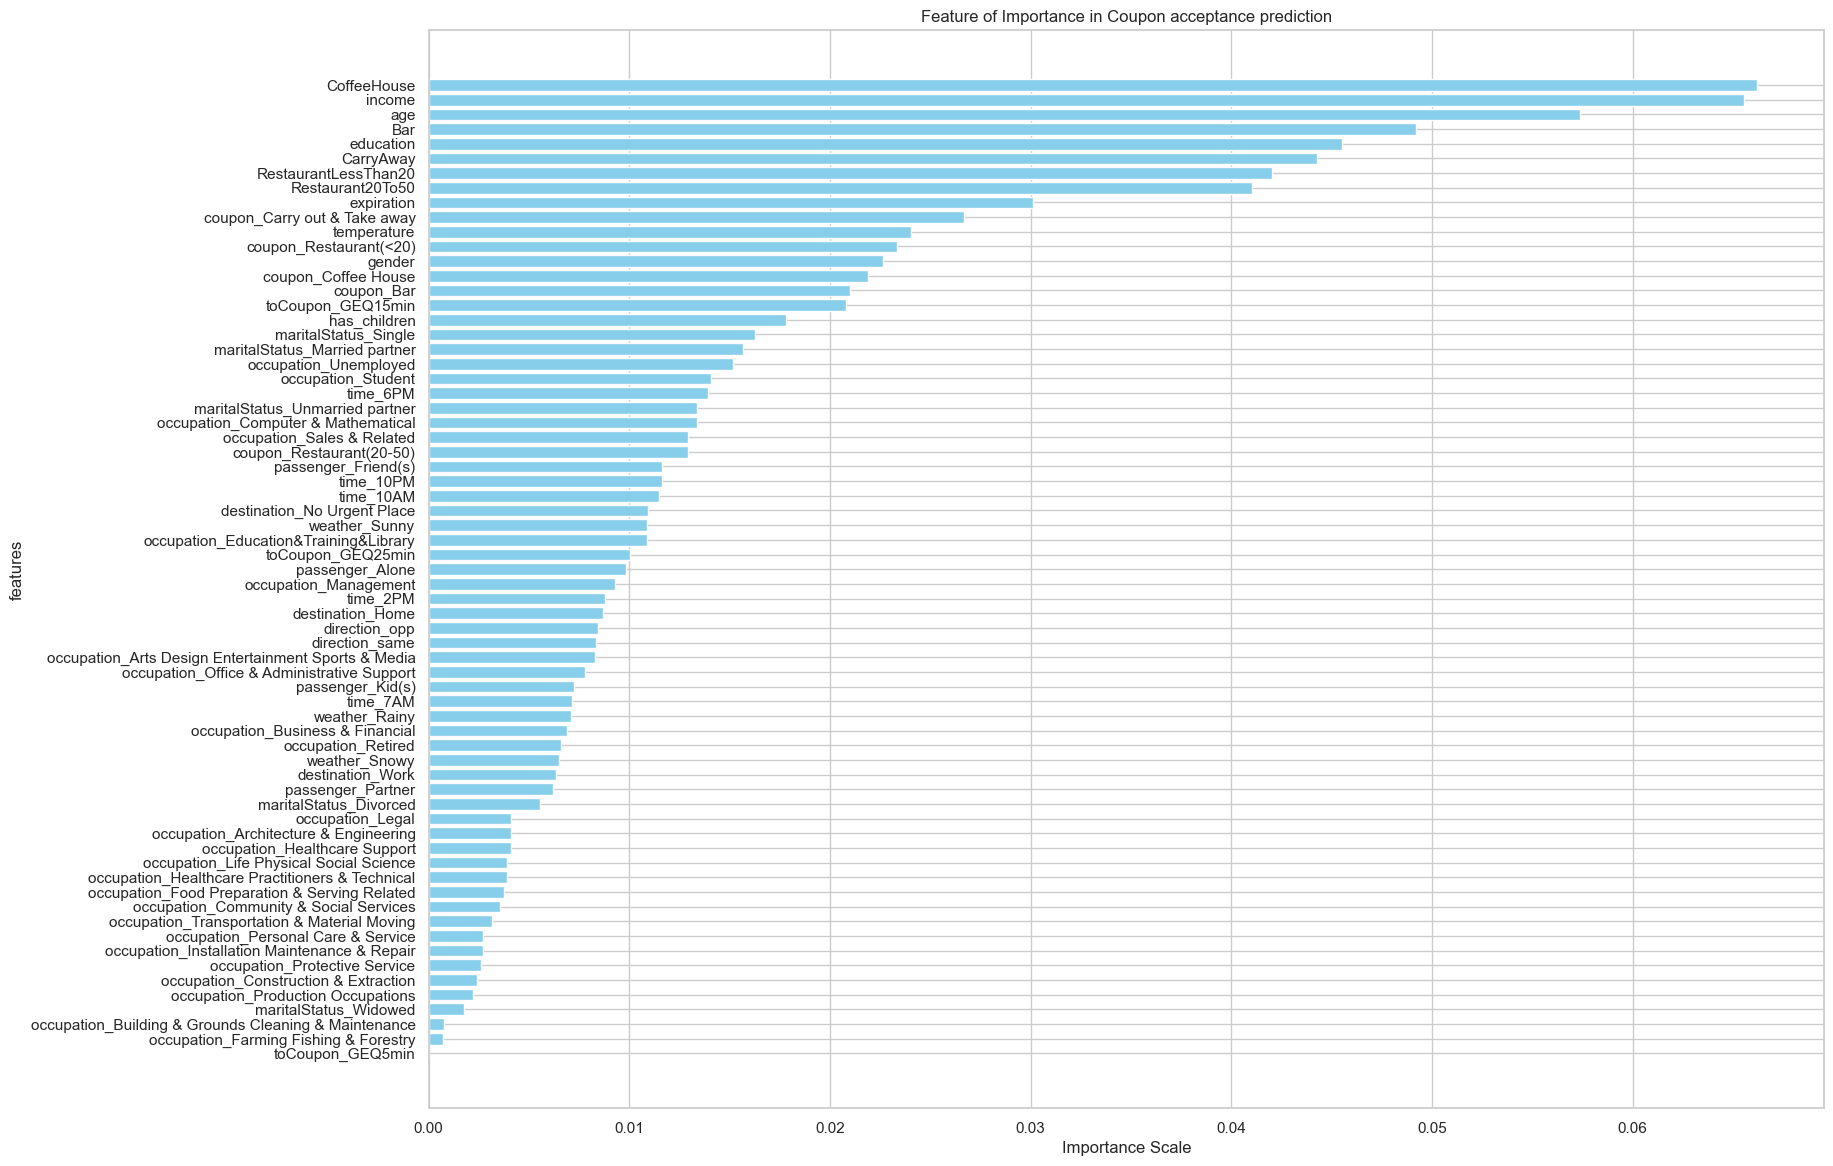

In [41]:
feature_imp = best_rf.feature_importances_
feature_df = pd.DataFrame({'Features':X_train.columns, 'Importance':feature_imp})
feature_df = feature_df.sort_values (by='Importance', ascending = False)
plt.figure(figsize=(18,14))
plt.barh(feature_df['Features'], feature_df['Importance'], color='skyblue')
plt.xlabel('Importance Scale')
plt.ylabel('features')
plt.title('Feature of Importance in Coupon acceptance prediction')
plt.gca().invert_yaxis()
plt.show()